# Ejercicio 4 - Parcial

Consideremos los datos disponibles en https://tinyurl.com/3t6kvv94, que representan
mediciones de horas mensuales de estudio y notas de alumnos. Vamos a pensar que la variable de
respuesta es la nota, 𝑦, que modelamos como dependiente de las horas de estudio, 𝑥.

## a)
Ajustar un modelo lineal de la forma 𝑦 ∼N(𝛽0 +𝛽1𝑥,𝜀) usando PyMC. Graficar y describir las
posterior de los parámetros 𝛽0, 𝛽1 y 𝜀 de la regresión.

### Desarrollo

Primero cargo los datos con los que voy a trabajar:

In [4]:
import os
import pandas as pd

datos_alumnos = os.path.join('..', '..', '..', 'datos', 'raw' ,'data-parcial2.csv')

df_alumnos = pd.read_csv(datos_alumnos)

df_alumnos.info()

# Esto servirá para despúes entrenar el modelo
Y = df_alumnos['Nota'].values.flatten()
X = df_alumnos['Horas'].values.flatten()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Horas   30 non-null     float64
 1   Nota    30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Observo la relación entre las variables:

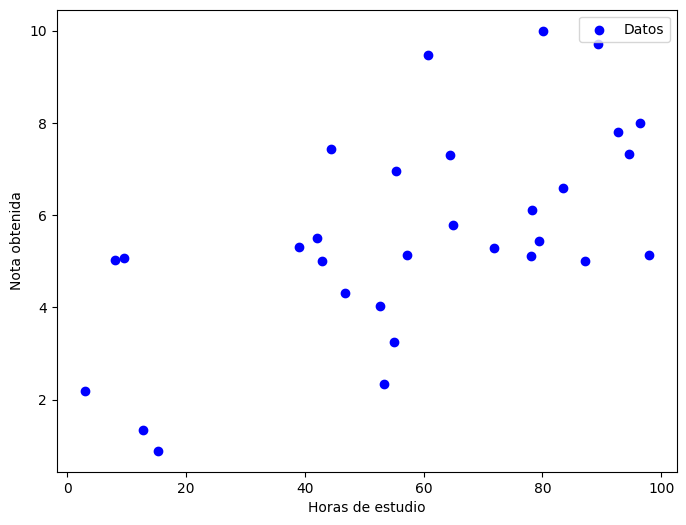

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota obtenida')
plt.legend()
plt.show()

Ahora ajusto un modelo usando PyMC tal como lo indica el enunciado:

In [7]:
import pymc as pm

with pm.Model() as model:
    
    # Como trabajamos con notas y horas de estudio, no tiene sentido que los parámetros sean negativos
    b0 = pm.HalfNormal('B0', sigma=10)
    b1 = pm.HalfNormal('B1', sigma=10)
    e = pm.HalfNormal('e', sigma=10)
    
    mu = b0 + b1*X
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma= e, observed=Y)
    
    trace = pm.sample(1000, tune=1000)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B0, B1, e]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.


Veo los resultados del modelo:

In [8]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
B0,2.735,0.804,1.201,4.217,0.022,0.016,1316.0,1084.0,1.0
B1,0.049,0.012,0.026,0.072,0.000,0.000,1247.0,1191.0,1.0
e,1.913,0.277,1.425,2.423,0.007,0.005,1621.0,1717.0,1.0


Grafico la posterior de los parámetros:

<Figure size 800x500 with 0 Axes>

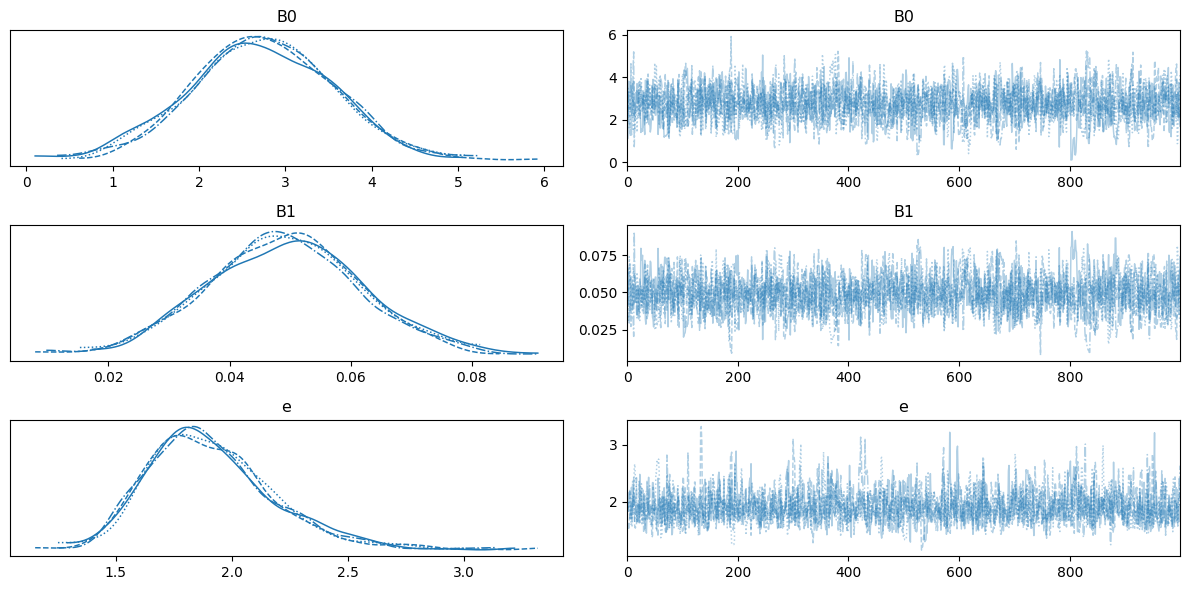

In [9]:
plt.figure(figsize=(8, 5))
pm.plot_trace(trace)
plt.tight_layout()
plt.show()

## b)
Calcular el 90% HDI de la nota que le corresponde a una persona que estudió 50 horas mensuales.

### Desarrollo

Para saber la nota que le corresponde a una persona que estudió 50 horas semanales, debo obtener
las distribuciones de todos los parámetros obtenidos de la posterior y "evaluarlos" en una cantidad de horas
de estudio igual a 50:

In [11]:
nota_50_horas = 50

nota_predicha = trace.posterior['B0'].values.flatten() + trace.posterior['B1'].values.flatten()*nota_50_horas

Y ahora con esta "nota_predicha" calculo el 90% HDI que me piden:

In [13]:
import arviz as az

hdi = az.hdi(nota_predicha, hdi_prob=0.9)

print(f'El 90% HDI para una persona que estudió 50 horas semanales es: {hdi}')

El 90% HDI para una persona que estudió 50 horas semanales es: [4.58850648 5.76373329]
